# Versuch 252 Aktivierung - Auswertung
#### Felix Fleischle - 25.2.2022

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [2]:
unterg =np.loadtxt('C:/Users/fexfl/Documents/.Keine Programme Docs/Studium/PAP2/252/Felix_David_Untergrund.dat', usecols=[1])

In [3]:
mittelw_unterg=np.mean(4*unterg)
fehler_unterg=np.std(4*unterg)/np.sqrt(len(unterg))
print('Mittelwert:', mittelw_unterg, 'Fehler:',fehler_unterg)

Mittelwert: 11.020408163265307 Fehler: 0.8680020555535112


In [4]:
n1 =np.loadtxt('C:/Users/fexfl/Documents/.Keine Programme Docs/Studium/PAP2/252/Felix_David_silber1.dat', usecols=[1])
n2 =np.loadtxt('C:/Users/fexfl/Documents/.Keine Programme Docs/Studium/PAP2/252/Felix_David_silber2.dat', usecols=[1])
n3 =np.loadtxt('C:/Users/fexfl/Documents/.Keine Programme Docs/Studium/PAP2/252/Felix_David_silber3.dat', usecols=[1])
n4 =np.loadtxt('C:/Users/fexfl/Documents/.Keine Programme Docs/Studium/PAP2/252/Felix_David_silber4.dat', usecols=[1])

N=n1+n2+n3+n4
Fehler_N=np.sqrt(N)

t=np.arange(5,405,10)

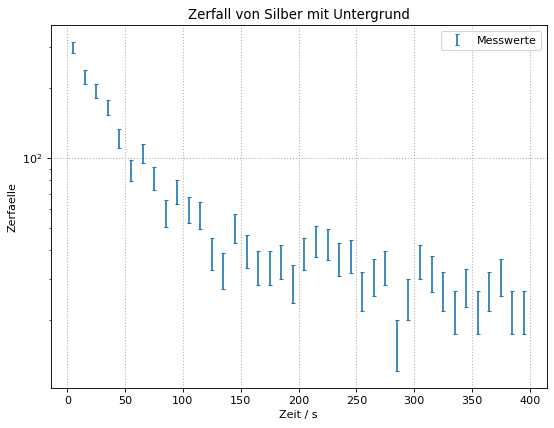

In [5]:
plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(t,N, Fehler_N, linestyle='None', label="Messwerte", capsize = 2)
plt.xlabel('Zeit / s')
plt.ylabel('Zerfaelle')
plt.title('Zerfall von Silber mit Untergrund')
plt.yscale('log')
plt.legend()
plt.grid(linestyle=":", linewidth=1)

In [6]:
y0=mittelw_unterg #Untergrund
def fit_func(x, A1,l1,A2,l2):
    return A1*np.exp(-x*l1) + A2*np.exp(-x*l2) + y0

popt, pcov=curve_fit(fit_func,t,N, p0=[500,0.02,50,0.001],sigma=Fehler_N)

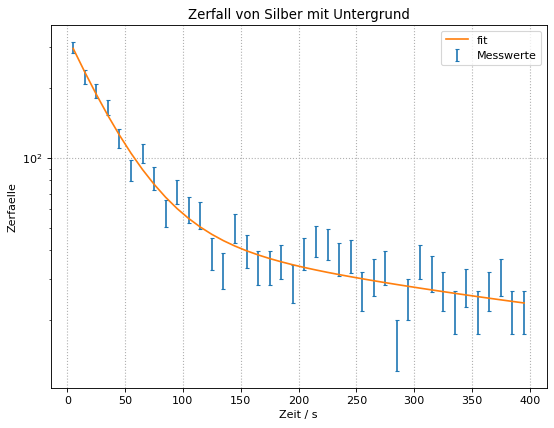

In [7]:
plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(t,N, Fehler_N, linestyle='None', label="Messwerte", capsize = 2)
plt.xlabel('Zeit / s')
plt.ylabel('Zerfaelle')
plt.title('Zerfall von Silber mit Untergrund')
plt.yscale('log')
plt.plot(t,fit_func(t,*popt), label="fit")
plt.legend()
plt.grid(linestyle=":", linewidth=1)

In [8]:
print("A1=",popt[0], ", Standardfehler=", np.sqrt(pcov[0][0]))
print("l1=",popt[1], ", Standardfehler=", np.sqrt(pcov[1][1]))
print("A2=",popt[2], ", Standardfehler=", np.sqrt(pcov[2][2]))
print("l2=",popt[3], ", Standardfehler=", np.sqrt(pcov[3][3]))

A1= 285.1422805327275 , Standardfehler= 18.812901253577955
l1= 0.028199318566941082 , Standardfehler= 0.0032675069585057378
A2= 39.17533164177607 , Standardfehler= 10.967153316851574
l2= 0.0028634023605370296 , Standardfehler= 0.001021005753672669


In [9]:
chi2_=np.sum((fit_func(t,*popt)-N)**2/Fehler_N**2)
dof=len(N)-4 #dof:degrees of freedom, Freiheitsgrad
chi2_red=chi2_/dof
print("chi2=", chi2_)
print("chi2_red=",chi2_red)

from scipy.stats import chi2
prob=round(1-chi2.cdf(chi2_,dof),2)*100
print("Wahrscheinlichkeit=", prob,"%")

chi2= 46.57015650893761
chi2_red= 1.2936154585816002
Wahrscheinlichkeit= 11.0 %


In [10]:
# Wiederholung mit variiertem Untergrund
y0_plus = mittelw_unterg + fehler_unterg
y0_minus = mittelw_unterg - fehler_unterg
def fit_func_plus(x, A1,l1,A2,l2):
    return A1*np.exp(-x*l1) + A2*np.exp(-x*l2) + y0_plus
def fit_func_minus(x, A1,l1,A2,l2):
    return A1*np.exp(-x*l1) + A2*np.exp(-x*l2) + y0_minus
popt_plus, pcov_plus=curve_fit(fit_func_plus,t,N, p0=[500,0.02,50,0.001],sigma=Fehler_N)
popt_minus, pcov_minus=curve_fit(fit_func_minus,t,N, p0=[500,0.02,50,0.001],sigma=Fehler_N)

In [11]:
print("Plus:")
print("A1=",popt_plus[0], ", Standardfehler=", np.sqrt(pcov_plus[0][0]))
print("l1=",popt_plus[1], ", Standardfehler=", np.sqrt(pcov_plus[1][1]))
print("A2=",popt_plus[2], ", Standardfehler=", np.sqrt(pcov_plus[2][2]))
print("l2=",popt_plus[3], ", Standardfehler=", np.sqrt(pcov_plus[3][3]))
print("Minus:")
print("A1=",popt_minus[0], ", Standardfehler=", np.sqrt(pcov_minus[0][0]))
print("l1=",popt_minus[1], ", Standardfehler=", np.sqrt(pcov_minus[1][1]))
print("A2=",popt_minus[2], ", Standardfehler=", np.sqrt(pcov_minus[2][2]))
print("l2=",popt_minus[3], ", Standardfehler=", np.sqrt(pcov_minus[3][3]))

Plus:
A1= 284.79994214501886 , Standardfehler= 18.896959441802508
l1= 0.028247581622014118 , Standardfehler= 0.003313801144943892
A2= 38.72219384065353 , Standardfehler= 11.344146721353567
l2= 0.0030056904997335537 , Standardfehler= 0.0010738161021219828
Minus:
A1= 285.4462610125108 , Standardfehler= 18.74277450611554
l1= 0.028155544226493117 , Standardfehler= 0.003226275942930603
A2= 39.67209005327257 , Standardfehler= 10.634639022857264
l2= 0.002733764853249309 , Standardfehler= 0.000973228441493468


In [12]:
# Differenzen:
l1_dplus = np.abs(popt[1]-popt_plus[1])
l1_dminus = np.abs(popt[1]-popt_minus[1])
print("Differenzen l1:", l1_dplus , l1_dminus)
l2_dplus = np.abs(popt[3]-popt_plus[3])
l2_dminus = np.abs(popt[3]-popt_minus[3])
print("Differenzen l2:", l2_dplus , l2_dminus)

# Mittelwert der Differenzen
l1_d = (l1_dplus + l1_dminus)/2
l2_d = (l2_dplus + l2_dminus)/2
print("Mittelwerte", l1_d, l2_d)

#Gesamtfehler
l1_err = np.sqrt( np.sqrt(pcov[1][1])**2 + l1_d**2 )
l2_err = np.sqrt( np.sqrt(pcov[3][3])**2 + l2_d**2 )
print("Gesamtfehler:", l1_err, l2_err)

Differenzen l1: 4.826305507303619e-05 4.3774340447964855e-05
Differenzen l2: 0.00014228813919652406 0.00012963750728772067
Mittelwerte 4.601869776050052e-05 0.00013596282324212236
Gesamtfehler: 0.0032678309999794953 0.0010300187563033324


In [13]:
l1 = popt[1]
l2 = popt[3]

# Halbwertszeiten
T_l1 = np.log(2)/l1
T_l1_err = np.log(2)*l1_err / l1**2

T_l2 = np.log(2)/l2
T_l2_err = np.log(2)*l2_err / l2**2

print("Halbwertszeit 1:", T_l1, "+-", T_l1_err, "[s]")
print("Halbwertszeit 2:", T_l2, "+-", T_l2_err, "[s]")

#Lebensdauer
tau_l1 = 1/l1
tau_l1_err = l1_err / l1**2

tau_l2 = 1/l2
tau_l2_err = l2_err / l2**2

print("Lebensdauer 1:", tau_l1, "+-", tau_l1_err, "[s]")
print("Lebensdauer 2:", tau_l2, "+-", tau_l2_err, "[s]")

Halbwertszeit 1: 24.58028121901296 +- 2.8484448929156336 [s]
Halbwertszeit 2: 242.07117732135484 +- 87.07747693365111 [s]
Lebensdauer 1: 35.46184981832612 +- 4.109437321254879 [s]
Lebensdauer 2: 349.2348870636715 +- 125.62624414530157 [s]


In [14]:
# Sigma Abweichugnen
T_l1_lit = 24.6
T_l2_lit = 144.6

sigma_tl1 = np.abs((T_l1 - T_l1_lit)/T_l1_err)
sigma_tl2 = np.abs((T_l2 - T_l2_lit)/T_l2_err)
print("Abweichungen:", sigma_tl1, sigma_tl2)

Abweichungen: 0.006922647875717715 1.119361524399969


In [15]:
# Indium
nind =np.loadtxt('C:/Users/fexfl/Documents/.Keine Programme Docs/Studium/PAP2/252/Felix_David_indium.dat', usecols=[1])
Fehler_nind=np.sqrt(nind)

tind=np.arange(5,3005,120)

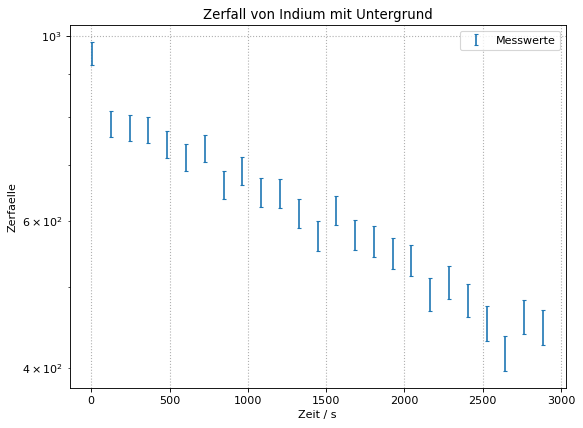

In [16]:
plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(tind,nind, Fehler_nind, linestyle='None', label="Messwerte", capsize = 2)
plt.xlabel('Zeit / s')
plt.ylabel('Zerfaelle')
plt.title('Zerfall von Indium mit Untergrund')
plt.yscale('log')
plt.legend()
plt.grid(linestyle=":", linewidth=1)

In [17]:
y0=mittelw_unterg *12/4 #Untergrund
nind_corr = nind[1:]
Fehler_nind_corr = Fehler_nind[1:]
tind_corr = tind[1:]

def expfunc(x, A3,l3):
    return A3*np.exp(-x*l3) + y0

poptind, pcovind=curve_fit(expfunc,tind_corr,nind_corr, p0=[500,0.02],sigma=Fehler_nind_corr)

<ipython-input-17-b7769532caa0>:7: RuntimeWarning: overflow encountered in exp
  return A3*np.exp(-x*l3) + y0


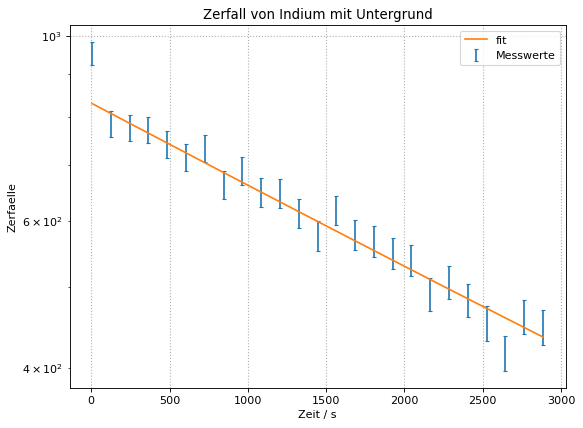

In [18]:
plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(tind,nind, Fehler_nind, linestyle='None', label="Messwerte", capsize = 2)
plt.xlabel('Zeit / s')
plt.ylabel('Zerfaelle')
plt.title('Zerfall von Indium mit Untergrund')
plt.yscale('log')
plt.plot(tind,expfunc(tind,*poptind), label="fit")
plt.legend()
plt.grid(linestyle=":", linewidth=1)

In [19]:
print("A3=",poptind[0], ", Standardfehler=", np.sqrt(pcovind[0][0]))
print("l3=",poptind[1], ", Standardfehler=", np.sqrt(pcovind[1][1]))

#print(np.log(2)/poptind[1])

A3= 797.7878217368338 , Standardfehler= 10.978304078407582
l3= 0.00023684299345154986 , Standardfehler= 8.779103404241653e-06


In [20]:
chi2_ind=np.sum((expfunc(tind_corr,*poptind)-nind_corr)**2/Fehler_nind_corr**2)
dof_ind=len(nind_corr)-4 #dof:degrees of freedom, Freiheitsgrad
chi2_red_ind=chi2_ind/dof_ind
print("chi2=", chi2_ind)
print("chi2_red=",chi2_red_ind)

from scipy.stats import chi2
prob_ind=round(1-chi2.cdf(chi2_ind,dof_ind),2)*100
print("Wahrscheinlichkeit=", prob_ind,"%")

chi2= 14.843623005432569
chi2_red= 0.7421811502716285
Wahrscheinlichkeit= 79.0 %


In [21]:
# Wiederholung mit variiertem Untergrund
def expfunc_plus(x, A3,l3):
    return A3*np.exp(-x*l3) + (y0_plus*12/4)
def expfunc_minus(x, A3,l3):
    return A3*np.exp(-x*l3) + (y0_minus*12/4)
popt_plus_ind, pcov_plus_ind=curve_fit(expfunc_plus,tind_corr,nind_corr, p0=[500,0.02],sigma=Fehler_nind_corr)
popt_minus_ind, pcov_minus_ind=curve_fit(expfunc_minus,tind_corr,nind_corr, p0=[500,0.02],sigma=Fehler_nind_corr)

<ipython-input-21-69387cc9f358>:3: RuntimeWarning: overflow encountered in exp
  return A3*np.exp(-x*l3) + (y0_plus*12/4)
<ipython-input-21-69387cc9f358>:5: RuntimeWarning: overflow encountered in exp
  return A3*np.exp(-x*l3) + (y0_minus*12/4)


In [22]:
print("Plus:")
print("A3=",popt_plus_ind[0], ", Standardfehler=", np.sqrt(pcov_plus_ind[0][0]))
print("l3=",popt_plus_ind[1], ", Standardfehler=", np.sqrt(pcov_plus_ind[1][1]))
print("Minus:")
print("A3=",popt_minus_ind[0], ", Standardfehler=", np.sqrt(pcov_minus_ind[0][0]))
print("l3=",popt_minus_ind[1], ", Standardfehler=", np.sqrt(pcov_minus_ind[1][1]))

Plus:
A3= 795.3063209322307 , Standardfehler= 10.994711369577999
l3= 0.00023793692921360234 , Standardfehler= 8.827303823264e-06
Minus:
A3= 800.2703613107133 , Standardfehler= 10.962117733061122
l3= 0.000235758988490565 , Standardfehler= 8.731470783821266e-06


In [23]:
# Differenzen:
l3_dplus = np.abs(poptind[1]-popt_plus_ind[1])
l3_dminus = np.abs(poptind[1]-popt_minus_ind[1])
print("Differenzen l3:", l3_dplus , l3_dminus)

# Mittelwert der Differenzen
l3_d = (l3_dplus + l3_dminus)/2
print("Mittelwerte", l3_d)

#Gesamtfehler
l3_err = np.sqrt( np.sqrt(pcovind[1][1])**2 + l3_d**2 )
print("Gesamtfehler:", l3_err)

Differenzen l3: 1.0939357620524785e-06 1.084004960984848e-06
Mittelwerte 1.0889703615186633e-06
Gesamtfehler: 8.846384178331476e-06


In [24]:
l3 = poptind[1]

# Halbwertszeiten
T_l3 = np.log(2)/l3
T_l3_err = np.log(2)*l3_err / l3**2

print("Halbwertszeit 3:", T_l3, "+-", T_l3_err, "[s]")

#Lebensdauer
tau_l3 = 1/l3
tau_l3_err = l3_err / l3**2

print("Lebensdauer 3:", tau_l3, "+-", tau_l3_err, "[s]")

Halbwertszeit 3: 2926.61045386483 +- 109.31258737238322 [s]
Lebensdauer 3: 4222.206388404588 +- 157.7047277088788 [s]


In [25]:
T_l3_lit = 3240

sigma_tl3 = np.abs((T_l3 - T_l3_lit)/T_l3_err)
print(sigma_tl3)

2.8669117955060384
